# Демонстрация. Расчет количества наблюдений для эксперимента по формуле

Расчет матрицы, на основе которой можно выбрать требуемое количество наблюдений для эксперимента.
Переменные для управления:
- **sigmas** - возможные стандартные отклонения метрики
- **effect_sizes** - возможные эффекты

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, norm
import seaborn as sns
import matplotlib.pyplot as plt
import time

import pickle

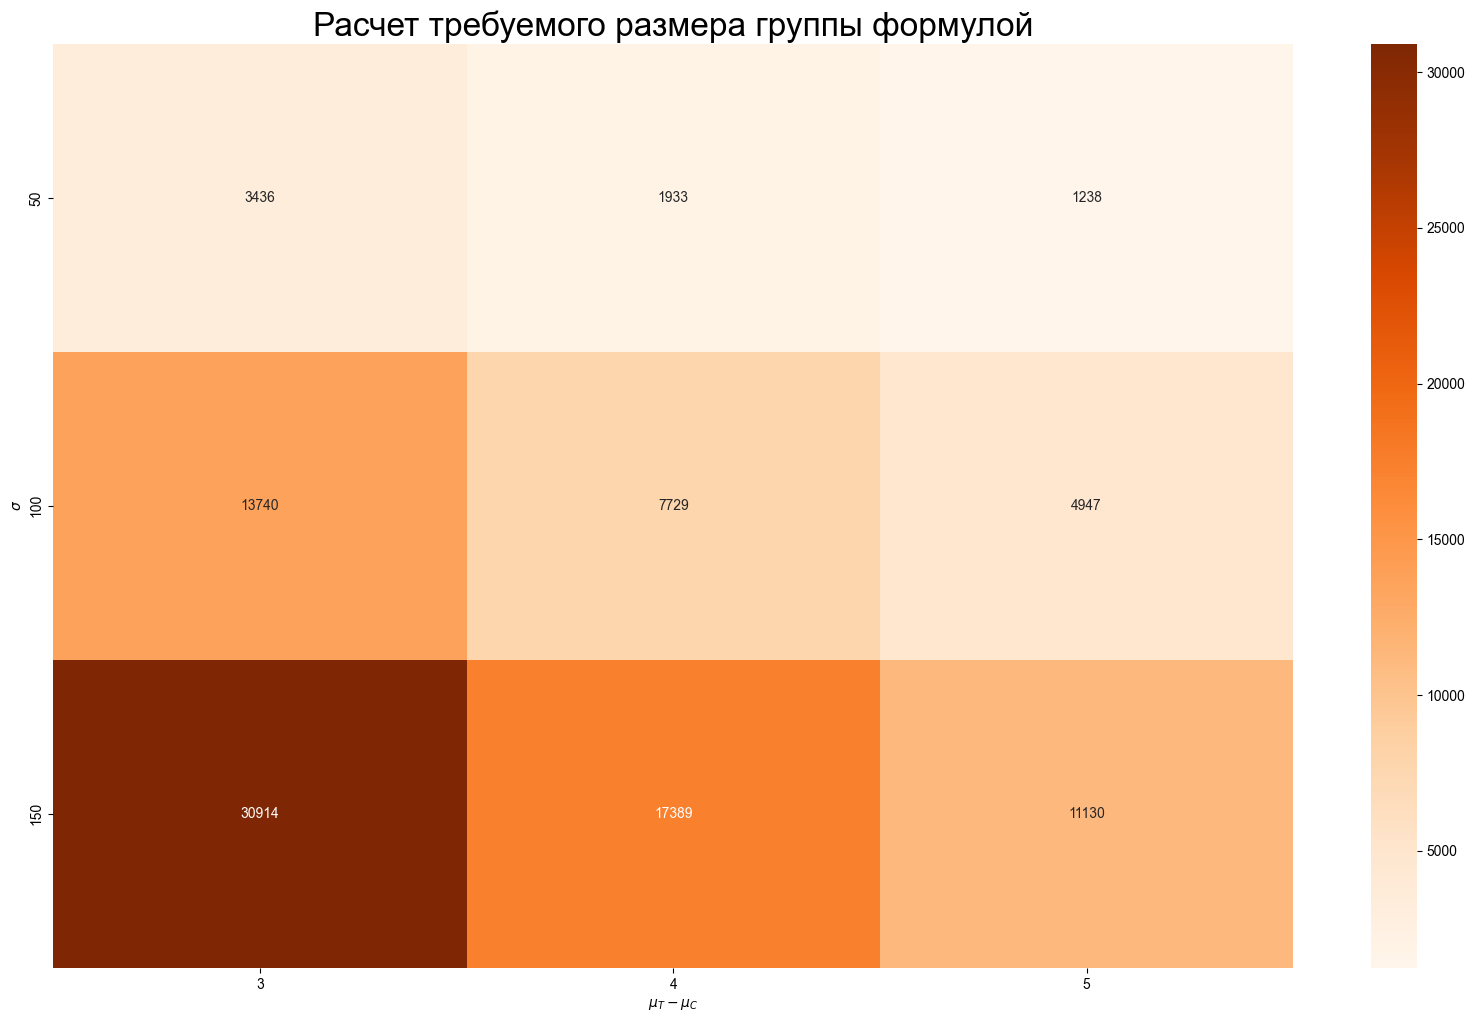

CPU times: total: 266 ms
Wall time: 273 ms


In [3]:
%%time


sigmas = list(range(50, 200, 50))      # sigmas - стандартные отклонения
effect_sizes = list(range(3, 6, 1))    # effect_sizes - эффекты

ns_ = []
sg_ = []
es_ = []

alpha = 0.05 # type I error
beta = 0.2   # type II error

for sigma in sigmas:
    for effect_size in effect_sizes:
        sg_.append(sigma)
        es_.append(effect_size)
        
        k = abs(norm.ppf(1-alpha)) + abs(norm.ppf(1-beta)) 
        n = int(round(2 * k**2 * sigma ** 2 / effect_size ** 2, 0) + 1)
        ns_.append(n)
        
data_ = pd.DataFrame({
    'sigma': sg_,
    'effect_size': es_,
    'sample_size': ns_
})


data_pivot_ = data_.pivot(index='sigma', columns='effect_size', values='sample_size')
pickle.dump(data_pivot_, open('../data_pivot_.pkl','wb'))

plt.figure(figsize=(20, 12))
sns.heatmap(data_pivot_, cmap='Oranges', annot=True, fmt='g')
sns.set(font_scale=2)
plt.title('Расчет требуемого размера группы формулой')
plt.xlabel(r'$\mu_T - \mu_C$')
plt.ylabel(r'$\sigma$')
plt.show()